In [2]:
#ColaboratoryかKaggleNotebookか判別
import sys
import os
from pathlib import Path

if 'google.colab' in sys.modules:  # colab環境
    INPUT = Path('/content/input/')

    # drive mount
    from google.colab import drive
    drive.mount('/content/drive/')

    # working dir に移動
    os.chdir('/content/drive/MyDrive/git/kaggle-inclass-mnesframingham')
    print("cwd:", os.getcwd())
    
elif 'kaggle_web_client' in sys.modules:  # kaggle環境
    INPUT = Path('../input/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
cwd: /content/drive/MyDrive/git/kaggle-inclass-mnesframingham


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
train = pd.read_feather('./data/interim/train.feather').drop("index",axis=1)
test = pd.read_feather('./data/interim/test.feather').drop("index",axis=1)

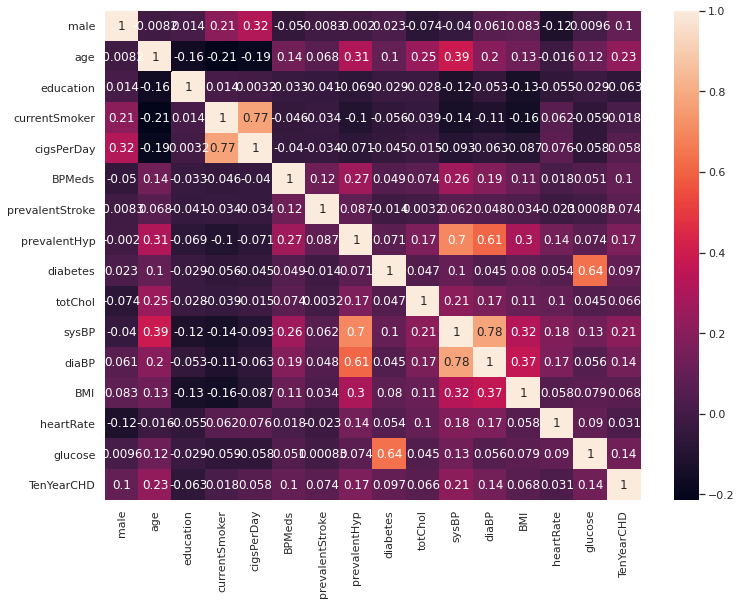

In [19]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True, ax=ax)

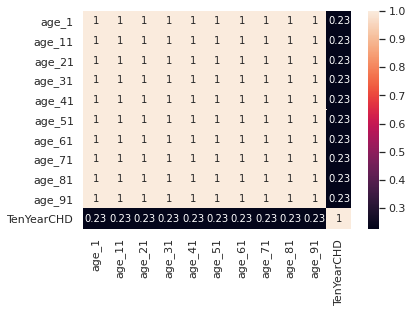

In [32]:
# まずは年齢から
age_list = []

for n in range(1, 100, 10):
    age_name = f"age_{n}"
    age_list.append(age_name)
    train[age_name] = train["age"]**(0.01*n)

sns.heatmap(train[age_list+["TenYearCHD"]].corr(), annot=True)